In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('train House Price.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
data.drop(columns = ['Alley','PoolQC','MiscFeature','Fence','FireplaceQu'],inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [6]:
len(data)

1460

In [7]:
def filling_na(df):
    object_list = df.select_dtypes('object').columns
    number_list = df.select_dtypes('number').columns
    number_list = number_list[~number_list.isin(['TARGET'])]
    df[number_list] = df[number_list].fillna(df[number_list].median())
    df[object_list] = df[object_list].fillna(df[object_list].mode().iloc[0])
    return df

In [8]:
data = filling_na(data)

In [9]:
columns_for_onehot = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']



In [10]:
data_11= pd.get_dummies(data, columns=columns_for_onehot, drop_first=True)

In [11]:
data_11.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.011156,-0.009921,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.058765,-0.020738,-0.018998,0.038920,0.026133,-0.034852,-0.009018,0.004865,0.015881,-0.020738
MSSubClass,0.011156,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.001244,0.014005,-0.045156,-0.014555,0.026359,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.009921,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,...,0.012609,-0.051283,0.128995,-0.023074,-0.091864,-0.036570,-0.018040,0.016250,-0.074146,0.127293
LotArea,-0.033226,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.001076,-0.015040,0.020039,-0.005722,-0.002292,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,-0.028365,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.004269,-0.021172,0.327412,-0.057962,-0.225013,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.034852,0.016241,-0.036570,-0.013208,-0.041677,-0.038888,-0.045601,-0.040294,-0.011783,-0.014874,...,-0.003073,-0.003073,-0.015827,-0.002378,0.020457,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,-0.009018,0.030002,-0.018040,0.008966,-0.044950,-0.033444,-0.010104,-0.020727,-0.013748,0.021369,...,-0.005337,-0.005337,-0.027489,-0.004131,0.035530,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.004865,0.000983,0.016250,-0.010781,-0.025515,-0.023873,-0.035785,-0.048056,-0.009535,0.000765,...,-0.006909,-0.006909,-0.035587,-0.005348,0.028599,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.015881,0.024359,-0.074146,0.005711,-0.143282,0.161642,-0.158427,-0.120577,-0.081539,-0.019560,...,-0.003139,0.027414,-0.645698,-0.097031,0.634322,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


In [12]:
corr =data_11.corr()
corr2 = corr.iloc[-1:,:]
corr2

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
SaleCondition_Partial,-0.020738,-0.051068,0.127293,0.022635,0.323295,-0.151659,0.343895,0.322837,0.162205,0.044912,...,-0.017938,-0.017938,0.986819,-0.013885,-0.769559,-0.016038,-0.027856,-0.036062,-0.654323,1.0


Text(0.5, 1.0, 'Variable Correlation Heatmap')

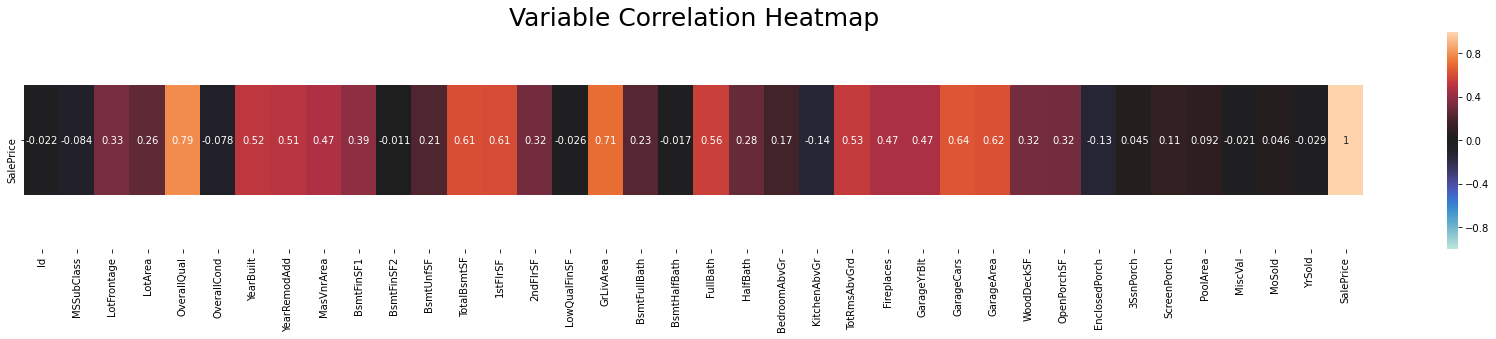

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
corr =data.corr()
corr2 = corr.iloc[-1:,:]
# corr3 = corr2.iloc[-1:,:50]

# plt.figure(figsize=(50,3),annot=True)
# sns.heatmap(corr2)
# plt.title('Variable Correlation Heatmap',fontsize=25)

# plt.figure(figsize=(30,4))
# ax = sns.heatmap(corr2,annot=True,vmin=-1,vmax=1,center=0)

# bottom,top = ax.get_ylim()
# ax.set_ylim(bottom+0.5,top-0.5)
# plt.title('Variable Correlation Heatmap',fontsize=25)

plt.figure(figsize=(30,4))
ax = sns.heatmap(corr2,annot=True,vmin=-1,vmax=1,center=0)

bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.title('Variable Correlation Heatmap',fontsize=25)

In [15]:
corr2.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

## Modeling

In [166]:
XXX = data[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']]
data_10 = data_11.drop(columns = ['Id','MSSubClass','LotFrontage','LotArea','OverallCond','MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2','2ndFlrSF',
       'LowQualFinSF','BsmtFullBath', 'BsmtHalfBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','Fireplaces', 'GarageYrBlt','WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'])

In [17]:
data_10

,OverallQual,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,7,2003,2003,150,856,856,1710,2,8,2,...,0,0,0,0,1,0,0,0,1,0
1,6,1976,1976,284,1262,1262,1262,2,6,2,...,0,0,0,0,1,0,0,0,1,0
2,7,2001,2002,434,920,920,1786,2,6,2,...,0,0,0,0,1,0,0,0,1,0
3,7,1915,1970,540,756,961,1717,1,7,3,...,0,0,0,0,1,0,0,0,0,0
4,8,2000,2000,490,1145,1145,2198,2,9,3,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,953,1647,2,7,2,...,0,0,0,0,1,0,0,0,1,0
1456,6,1978,1988,589,1542,2073,2073,2,7,2,...,0,0,0,0,1,0,0,0,1,0
1457,7,1941,2006,877,1152,1188,2340,2,9,1,...,0,0,0,0,1,0,0,0,1,0
1458,5,1950,1996,0,1078,1078,1078,1,5,1,...,0,0,0,0,1,0,0,0,1,0


In [18]:
from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# data_11 = scaler.fit_transform(data_10.iloc[:,:])

In [19]:
data_19 = pd.DataFrame(data_11, index=data_10.index, columns=data_10.columns)
data_19

,OverallQual,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,7,2003,2003,150,856,856,1710,2,8,2,...,0,0,0,0,1,0,0,0,1,0
1,6,1976,1976,284,1262,1262,1262,2,6,2,...,0,0,0,0,1,0,0,0,1,0
2,7,2001,2002,434,920,920,1786,2,6,2,...,0,0,0,0,1,0,0,0,1,0
3,7,1915,1970,540,756,961,1717,1,7,3,...,0,0,0,0,1,0,0,0,0,0
4,8,2000,2000,490,1145,1145,2198,2,9,3,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,953,1647,2,7,2,...,0,0,0,0,1,0,0,0,1,0
1456,6,1978,1988,589,1542,2073,2073,2,7,2,...,0,0,0,0,1,0,0,0,1,0
1457,7,1941,2006,877,1152,1188,2340,2,9,1,...,0,0,0,0,1,0,0,0,1,0
1458,5,1950,1996,0,1078,1078,1078,1,5,1,...,0,0,0,0,1,0,0,0,1,0


In [20]:
from sklearn.model_selection import train_test_split,cross_val_score

In [21]:
X = data_19.drop(columns='SalePrice')
y = data_19['SalePrice']

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [30]:
from sklearn.model_selection import cross_val_score,RepeatedKFold
cv= RepeatedKFold(n_splits = 5,n_repeats=4,random_state = 42)
def rmse_cv(model):
    return np.sqrt(-cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=cv))

from sklearn import linear_model, svm, neural_network, neighbors, tree, ensemble

import numpy as np
from sklearn import linear_model
from sklearn import svm
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
classifier = [svm.SVR(),
#     linear_model.BayesianRidge(),
#     linear_model.Ridge(),
#     linear_model.ARDRegression(),
        ensemble.RandomForestRegressor(n_estimators = 100),
        XGBRegressor(),
#         CatBoostRegressor(),
        LGBMRegressor()]
        
              
#     neural_network.MLPRegressor(),
#     linear_model.LinearRegression(),
#     linear_model.PassiveAggressiveRegressor(),
#     linear_model.SGDRegressor(),
# #     linear_model.TheilSenRegressor(),
#     tree.DecisionTreeRegressor(),
# #     linear_model.LogisticRegression(),
#     svm.NuSVR(),
             

for item in classifier:
    print(item)
    clf = item
    clf.fit(X_train,y_train)
    print('train score: ',clf.score(X_train,y_train))
    print('test score: ',clf.score(X_test,y_test))
    print('RMSE: ',rmse_cv(clf).mean(),'\n')

SVR()
train score:  -0.05025856037536114
test score:  -0.04777351857785006
RMSE:  80247.19277223005 

RandomForestRegressor()
train score:  0.978343718146196
test score:  0.834704341636546
RMSE:  29864.214754552922 

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
train score:  0.9993185094051066
test score:  0.8865381476667413
RMSE:  30824.784951079095 

LGBMRegressor()
train score:  0.9680604601888135
test score:  0.844

In [31]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
model.score(X_test,y_test)

0.8865381476667413

In [33]:
scores = cross_val_score(model,X,y,cv=cv,scoring='neg_mean_absolute_error')

In [34]:
np.mean(scores)

-18224.25439720676

In [35]:
from lightgbm import LGBMRegressor
model = LGBMRegressor()

In [36]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8449370698997478

In [37]:
scores = cross_val_score(model,X,y,cv=cv,scoring='neg_mean_absolute_error')
np.mean(scores)

-17530.636426085726

In [38]:
from catboost import CatBoostRegressor

In [39]:
model = CatBoostRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

Learning rate set to 0.040124
0:	learn: 76533.9992789	total: 41.9ms	remaining: 41.8s
1:	learn: 74598.4550379	total: 85.4ms	remaining: 42.6s
2:	learn: 72955.6595529	total: 125ms	remaining: 41.7s
3:	learn: 70989.9940165	total: 147ms	remaining: 36.7s
4:	learn: 69353.6526921	total: 170ms	remaining: 33.8s
5:	learn: 67725.0338016	total: 199ms	remaining: 33s
6:	learn: 66075.1030113	total: 235ms	remaining: 33.3s
7:	learn: 64631.8671849	total: 303ms	remaining: 37.6s
8:	learn: 63147.1542585	total: 337ms	remaining: 37.1s
9:	learn: 61656.1990965	total: 363ms	remaining: 35.9s
10:	learn: 60179.7649621	total: 378ms	remaining: 34s
11:	learn: 58801.6816423	total: 429ms	remaining: 35.3s
12:	learn: 57503.6311632	total: 450ms	remaining: 34.2s
13:	learn: 56427.7767424	total: 482ms	remaining: 34s
14:	learn: 55209.1233750	total: 507ms	remaining: 33.3s
15:	learn: 54221.4705614	total: 526ms	remaining: 32.4s
16:	learn: 53075.2408427	total: 547ms	remaining: 31.6s
17:	learn: 52087.0600413	total: 566ms	remaining: 

150:	learn: 20437.7918234	total: 5.73s	remaining: 32.2s
151:	learn: 20413.9867660	total: 5.77s	remaining: 32.2s
152:	learn: 20366.1186970	total: 5.86s	remaining: 32.4s
153:	learn: 20328.5659763	total: 5.9s	remaining: 32.4s
154:	learn: 20279.5194129	total: 5.94s	remaining: 32.4s
155:	learn: 20258.2432675	total: 6.02s	remaining: 32.5s
156:	learn: 20194.1599191	total: 6.06s	remaining: 32.5s
157:	learn: 20172.5420426	total: 6.16s	remaining: 32.8s
158:	learn: 20145.4346485	total: 6.21s	remaining: 32.8s
159:	learn: 20098.3666817	total: 6.27s	remaining: 32.9s
160:	learn: 20067.8760841	total: 6.3s	remaining: 32.8s
161:	learn: 19998.9773558	total: 6.38s	remaining: 33s
162:	learn: 19962.9120825	total: 6.43s	remaining: 33s
163:	learn: 19943.8375973	total: 6.48s	remaining: 33.1s
164:	learn: 19896.1644886	total: 6.57s	remaining: 33.3s
165:	learn: 19867.4921526	total: 6.63s	remaining: 33.3s
166:	learn: 19842.6683392	total: 6.7s	remaining: 33.4s
167:	learn: 19815.4590949	total: 6.81s	remaining: 33.7s

303:	learn: 15866.6636900	total: 13.1s	remaining: 30.1s
304:	learn: 15850.6273531	total: 13.2s	remaining: 30s
305:	learn: 15812.7302099	total: 13.2s	remaining: 29.9s
306:	learn: 15806.7998257	total: 13.2s	remaining: 29.8s
307:	learn: 15787.3412637	total: 13.2s	remaining: 29.8s
308:	learn: 15756.3877175	total: 13.3s	remaining: 29.7s
309:	learn: 15731.0598293	total: 13.3s	remaining: 29.6s
310:	learn: 15703.0417915	total: 13.3s	remaining: 29.5s
311:	learn: 15687.1085647	total: 13.3s	remaining: 29.4s
312:	learn: 15662.0205230	total: 13.4s	remaining: 29.3s
313:	learn: 15643.6498839	total: 13.4s	remaining: 29.3s
314:	learn: 15615.7646138	total: 13.4s	remaining: 29.2s
315:	learn: 15593.1868596	total: 13.4s	remaining: 29.1s
316:	learn: 15567.7697865	total: 13.4s	remaining: 29s
317:	learn: 15546.9285345	total: 13.5s	remaining: 28.9s
318:	learn: 15516.5666901	total: 13.5s	remaining: 28.8s
319:	learn: 15498.0170991	total: 13.5s	remaining: 28.7s
320:	learn: 15476.8321185	total: 13.6s	remaining: 28

451:	learn: 13201.2117205	total: 20.5s	remaining: 24.9s
452:	learn: 13181.6321130	total: 20.6s	remaining: 24.9s
453:	learn: 13164.8489314	total: 20.6s	remaining: 24.8s
454:	learn: 13150.1255458	total: 20.7s	remaining: 24.8s
455:	learn: 13124.7571911	total: 20.7s	remaining: 24.7s
456:	learn: 13110.4909672	total: 20.7s	remaining: 24.6s
457:	learn: 13093.8430649	total: 20.8s	remaining: 24.6s
458:	learn: 13083.7396419	total: 20.8s	remaining: 24.5s
459:	learn: 13057.5294312	total: 20.8s	remaining: 24.5s
460:	learn: 13047.1127068	total: 20.9s	remaining: 24.4s
461:	learn: 13036.1509842	total: 20.9s	remaining: 24.3s
462:	learn: 13023.5523081	total: 20.9s	remaining: 24.3s
463:	learn: 13012.9806863	total: 21s	remaining: 24.2s
464:	learn: 13000.8965824	total: 21s	remaining: 24.2s
465:	learn: 12983.9735105	total: 21.1s	remaining: 24.1s
466:	learn: 12958.2324200	total: 21.1s	remaining: 24.1s
467:	learn: 12953.8193073	total: 21.1s	remaining: 24s
468:	learn: 12952.1436071	total: 21.1s	remaining: 23.9

599:	learn: 11257.1023774	total: 26.8s	remaining: 17.9s
600:	learn: 11246.8248797	total: 26.8s	remaining: 17.8s
601:	learn: 11237.8715704	total: 26.8s	remaining: 17.7s
602:	learn: 11221.7287942	total: 26.9s	remaining: 17.7s
603:	learn: 11207.6049136	total: 26.9s	remaining: 17.6s
604:	learn: 11193.7964873	total: 26.9s	remaining: 17.6s
605:	learn: 11179.5823577	total: 27s	remaining: 17.5s
606:	learn: 11160.9899693	total: 27s	remaining: 17.5s
607:	learn: 11146.2724272	total: 27s	remaining: 17.4s
608:	learn: 11123.5130169	total: 27s	remaining: 17.3s
609:	learn: 11112.1261769	total: 27.1s	remaining: 17.3s
610:	learn: 11102.7631196	total: 27.1s	remaining: 17.2s
611:	learn: 11096.4946336	total: 27.1s	remaining: 17.2s
612:	learn: 11083.8876842	total: 27.1s	remaining: 17.1s
613:	learn: 11082.9390253	total: 27.2s	remaining: 17.1s
614:	learn: 11067.3613098	total: 27.2s	remaining: 17s
615:	learn: 11050.2358520	total: 27.3s	remaining: 17s
616:	learn: 11044.2184172	total: 27.3s	remaining: 16.9s
617:

747:	learn: 9731.9493921	total: 30.6s	remaining: 10.3s
748:	learn: 9728.7860784	total: 30.7s	remaining: 10.3s
749:	learn: 9715.7329278	total: 30.7s	remaining: 10.2s
750:	learn: 9705.7035100	total: 30.7s	remaining: 10.2s
751:	learn: 9698.0698984	total: 30.8s	remaining: 10.2s
752:	learn: 9694.9226344	total: 30.8s	remaining: 10.1s
753:	learn: 9683.2627218	total: 30.9s	remaining: 10.1s
754:	learn: 9669.5598627	total: 30.9s	remaining: 10s
755:	learn: 9662.5804642	total: 31s	remaining: 10s
756:	learn: 9645.9707970	total: 31s	remaining: 9.97s
757:	learn: 9642.4053115	total: 31.1s	remaining: 9.93s
758:	learn: 9636.8085723	total: 31.1s	remaining: 9.88s
759:	learn: 9627.1140255	total: 31.1s	remaining: 9.84s
760:	learn: 9617.7145347	total: 31.2s	remaining: 9.79s
761:	learn: 9609.4090910	total: 31.2s	remaining: 9.75s
762:	learn: 9604.3748623	total: 31.3s	remaining: 9.71s
763:	learn: 9587.6057620	total: 31.3s	remaining: 9.67s
764:	learn: 9576.0643657	total: 31.3s	remaining: 9.62s
765:	learn: 9566.8

900:	learn: 8438.5952562	total: 37s	remaining: 4.06s
901:	learn: 8433.2977464	total: 37s	remaining: 4.02s
902:	learn: 8424.1519341	total: 37.1s	remaining: 3.98s
903:	learn: 8423.7292943	total: 37.1s	remaining: 3.94s
904:	learn: 8419.0592923	total: 37.2s	remaining: 3.9s
905:	learn: 8410.5124186	total: 37.3s	remaining: 3.87s
906:	learn: 8403.5116655	total: 37.3s	remaining: 3.82s
907:	learn: 8395.0903187	total: 37.3s	remaining: 3.78s
908:	learn: 8387.7188971	total: 37.4s	remaining: 3.74s
909:	learn: 8379.6015323	total: 37.5s	remaining: 3.7s
910:	learn: 8379.1808390	total: 37.5s	remaining: 3.66s
911:	learn: 8372.9279464	total: 37.6s	remaining: 3.62s
912:	learn: 8364.0616134	total: 37.6s	remaining: 3.58s
913:	learn: 8363.4837177	total: 37.6s	remaining: 3.54s
914:	learn: 8353.2318805	total: 37.6s	remaining: 3.5s
915:	learn: 8339.8675173	total: 37.7s	remaining: 3.46s
916:	learn: 8326.8878143	total: 37.7s	remaining: 3.42s
917:	learn: 8321.7791047	total: 37.8s	remaining: 3.37s
918:	learn: 8313.

0.8823693822433752

In [40]:
scores = cross_val_score(model,X,y,cv=5,scoring='neg_mean_absolute_error')
np.mean(scores)

Learning rate set to 0.040124
0:	learn: 78553.0746982	total: 19ms	remaining: 19s
1:	learn: 76391.1722258	total: 50.2ms	remaining: 25.1s
2:	learn: 74608.0807108	total: 68.4ms	remaining: 22.7s
3:	learn: 72912.1799430	total: 97.3ms	remaining: 24.2s
4:	learn: 71304.7309259	total: 127ms	remaining: 25.2s
5:	learn: 69630.1626163	total: 159ms	remaining: 26.4s
6:	learn: 68034.0809127	total: 205ms	remaining: 29.1s
7:	learn: 66388.9515024	total: 234ms	remaining: 29s
8:	learn: 64958.3080682	total: 259ms	remaining: 28.5s
9:	learn: 63500.6008144	total: 301ms	remaining: 29.8s
10:	learn: 62161.7361103	total: 325ms	remaining: 29.3s
11:	learn: 60941.2580317	total: 366ms	remaining: 30.1s
12:	learn: 59717.3623410	total: 405ms	remaining: 30.7s
13:	learn: 58459.9919928	total: 434ms	remaining: 30.6s
14:	learn: 57347.7897821	total: 496ms	remaining: 32.6s
15:	learn: 56103.9855109	total: 563ms	remaining: 34.6s
16:	learn: 54972.2472352	total: 600ms	remaining: 34.7s
17:	learn: 53811.7871990	total: 630ms	remaining

149:	learn: 20211.7525627	total: 5.7s	remaining: 32.3s
150:	learn: 20148.7607580	total: 5.78s	remaining: 32.5s
151:	learn: 20103.4596840	total: 5.84s	remaining: 32.6s
152:	learn: 20069.6324034	total: 5.94s	remaining: 32.9s
153:	learn: 20015.4231422	total: 6.02s	remaining: 33.1s
154:	learn: 19977.6952141	total: 6.08s	remaining: 33.1s
155:	learn: 19927.6435462	total: 6.17s	remaining: 33.4s
156:	learn: 19867.2373638	total: 6.24s	remaining: 33.5s
157:	learn: 19813.9446539	total: 6.29s	remaining: 33.5s
158:	learn: 19785.1805071	total: 6.39s	remaining: 33.8s
159:	learn: 19762.1694793	total: 6.43s	remaining: 33.8s
160:	learn: 19719.7321625	total: 6.52s	remaining: 34s
161:	learn: 19675.8625423	total: 6.6s	remaining: 34.2s
162:	learn: 19627.1939161	total: 6.65s	remaining: 34.1s
163:	learn: 19583.9379996	total: 6.73s	remaining: 34.3s
164:	learn: 19553.5028726	total: 6.82s	remaining: 34.5s
165:	learn: 19501.2038593	total: 6.98s	remaining: 35s
166:	learn: 19468.9924184	total: 7.16s	remaining: 35.7

298:	learn: 15739.7122695	total: 15.3s	remaining: 35.8s
299:	learn: 15706.2463186	total: 15.3s	remaining: 35.7s
300:	learn: 15684.0160464	total: 15.4s	remaining: 35.7s
301:	learn: 15653.7129333	total: 15.4s	remaining: 35.7s
302:	learn: 15627.7519392	total: 15.5s	remaining: 35.6s
303:	learn: 15618.7571836	total: 15.5s	remaining: 35.6s
304:	learn: 15601.2131476	total: 15.6s	remaining: 35.5s
305:	learn: 15579.5158001	total: 15.7s	remaining: 35.5s
306:	learn: 15575.6132014	total: 15.8s	remaining: 35.6s
307:	learn: 15554.2907470	total: 15.8s	remaining: 35.6s
308:	learn: 15536.5370155	total: 15.9s	remaining: 35.6s
309:	learn: 15514.3041671	total: 16s	remaining: 35.6s
310:	learn: 15491.6191111	total: 16s	remaining: 35.6s
311:	learn: 15469.3964057	total: 16.1s	remaining: 35.6s
312:	learn: 15465.8621302	total: 16.2s	remaining: 35.5s
313:	learn: 15449.8282997	total: 16.2s	remaining: 35.5s
314:	learn: 15428.8635986	total: 16.3s	remaining: 35.5s
315:	learn: 15412.0303802	total: 16.3s	remaining: 35

449:	learn: 13187.3603282	total: 22.6s	remaining: 27.6s
450:	learn: 13184.5121089	total: 22.6s	remaining: 27.5s
451:	learn: 13159.3835772	total: 22.7s	remaining: 27.5s
452:	learn: 13131.8826753	total: 22.7s	remaining: 27.4s
453:	learn: 13111.5092914	total: 22.7s	remaining: 27.3s
454:	learn: 13088.4050606	total: 22.7s	remaining: 27.2s
455:	learn: 13074.4093365	total: 22.8s	remaining: 27.2s
456:	learn: 13064.6225751	total: 22.8s	remaining: 27.1s
457:	learn: 13039.5750598	total: 22.8s	remaining: 27s
458:	learn: 13026.3440492	total: 22.9s	remaining: 26.9s
459:	learn: 13006.3807513	total: 22.9s	remaining: 26.9s
460:	learn: 13004.8676549	total: 22.9s	remaining: 26.8s
461:	learn: 12985.7059374	total: 23s	remaining: 26.7s
462:	learn: 12963.3838455	total: 23s	remaining: 26.7s
463:	learn: 12942.4411049	total: 23s	remaining: 26.6s
464:	learn: 12929.6780060	total: 23.1s	remaining: 26.5s
465:	learn: 12908.5252607	total: 23.1s	remaining: 26.5s
466:	learn: 12893.0462028	total: 23.2s	remaining: 26.5s


599:	learn: 11268.7349053	total: 32s	remaining: 21.4s
600:	learn: 11257.1534328	total: 32.1s	remaining: 21.3s
601:	learn: 11252.1521542	total: 32.2s	remaining: 21.3s
602:	learn: 11237.1204330	total: 32.4s	remaining: 21.3s
603:	learn: 11234.6210409	total: 32.4s	remaining: 21.3s
604:	learn: 11219.6421643	total: 32.5s	remaining: 21.2s
605:	learn: 11208.5669141	total: 32.6s	remaining: 21.2s
606:	learn: 11193.0549746	total: 32.6s	remaining: 21.1s
607:	learn: 11182.6993195	total: 32.7s	remaining: 21.1s
608:	learn: 11166.4323054	total: 32.7s	remaining: 21s
609:	learn: 11152.0579230	total: 32.8s	remaining: 21s
610:	learn: 11141.0666150	total: 32.9s	remaining: 20.9s
611:	learn: 11129.6374621	total: 32.9s	remaining: 20.9s
612:	learn: 11117.4602802	total: 33s	remaining: 20.8s
613:	learn: 11102.9368781	total: 33s	remaining: 20.7s
614:	learn: 11093.7518585	total: 33.1s	remaining: 20.7s
615:	learn: 11087.3287394	total: 33.1s	remaining: 20.6s
616:	learn: 11083.8000523	total: 33.1s	remaining: 20.6s
61

749:	learn: 9829.9753570	total: 41.7s	remaining: 13.9s
750:	learn: 9817.0311907	total: 41.8s	remaining: 13.9s
751:	learn: 9809.1292353	total: 41.8s	remaining: 13.8s
752:	learn: 9800.4292218	total: 41.9s	remaining: 13.7s
753:	learn: 9791.2623315	total: 41.9s	remaining: 13.7s
754:	learn: 9784.3091534	total: 42s	remaining: 13.6s
755:	learn: 9777.8856745	total: 42s	remaining: 13.6s
756:	learn: 9772.2884624	total: 42.1s	remaining: 13.5s
757:	learn: 9764.4365243	total: 42.2s	remaining: 13.5s
758:	learn: 9752.8177264	total: 42.3s	remaining: 13.4s
759:	learn: 9744.5172176	total: 42.3s	remaining: 13.4s
760:	learn: 9736.4493938	total: 42.4s	remaining: 13.3s
761:	learn: 9721.0363719	total: 42.5s	remaining: 13.3s
762:	learn: 9706.5543038	total: 42.5s	remaining: 13.2s
763:	learn: 9696.1466627	total: 42.6s	remaining: 13.2s
764:	learn: 9687.4657364	total: 42.7s	remaining: 13.1s
765:	learn: 9675.0973522	total: 42.7s	remaining: 13s
766:	learn: 9668.5935129	total: 42.8s	remaining: 13s
767:	learn: 9661.4

901:	learn: 8718.8734386	total: 51s	remaining: 5.54s
902:	learn: 8712.3236848	total: 51s	remaining: 5.48s
903:	learn: 8704.7702833	total: 51.1s	remaining: 5.42s
904:	learn: 8694.7488646	total: 51.1s	remaining: 5.36s
905:	learn: 8688.2437552	total: 51.1s	remaining: 5.3s
906:	learn: 8685.3556428	total: 51.1s	remaining: 5.24s
907:	learn: 8677.1146891	total: 51.2s	remaining: 5.19s
908:	learn: 8664.1886270	total: 51.2s	remaining: 5.13s
909:	learn: 8655.9527344	total: 51.3s	remaining: 5.07s
910:	learn: 8653.6404102	total: 51.4s	remaining: 5.02s
911:	learn: 8649.9221395	total: 51.4s	remaining: 4.96s
912:	learn: 8641.0536834	total: 51.5s	remaining: 4.9s
913:	learn: 8631.4096187	total: 51.5s	remaining: 4.85s
914:	learn: 8622.9152751	total: 51.5s	remaining: 4.79s
915:	learn: 8613.8178593	total: 51.6s	remaining: 4.73s
916:	learn: 8604.3084852	total: 51.6s	remaining: 4.67s
917:	learn: 8599.8372266	total: 51.7s	remaining: 4.61s
918:	learn: 8594.8917684	total: 51.7s	remaining: 4.56s
919:	learn: 8587

53:	learn: 31383.8479534	total: 2.31s	remaining: 40.5s
54:	learn: 31077.2215152	total: 2.4s	remaining: 41.2s
55:	learn: 30760.0801009	total: 2.42s	remaining: 40.9s
56:	learn: 30499.8728441	total: 2.45s	remaining: 40.5s
57:	learn: 30240.9728708	total: 2.48s	remaining: 40.2s
58:	learn: 29923.2456664	total: 2.52s	remaining: 40.1s
59:	learn: 29641.1813753	total: 2.55s	remaining: 40s
60:	learn: 29397.2972241	total: 2.59s	remaining: 39.8s
61:	learn: 29133.1418789	total: 2.61s	remaining: 39.4s
62:	learn: 28848.2565699	total: 2.64s	remaining: 39.3s
63:	learn: 28579.3890394	total: 2.67s	remaining: 39s
64:	learn: 28353.4825516	total: 2.71s	remaining: 38.9s
65:	learn: 28173.8855811	total: 2.73s	remaining: 38.6s
66:	learn: 27936.4403416	total: 2.77s	remaining: 38.5s
67:	learn: 27725.0816178	total: 2.79s	remaining: 38.2s
68:	learn: 27569.0582186	total: 2.81s	remaining: 37.9s
69:	learn: 27357.0495320	total: 2.82s	remaining: 37.5s
70:	learn: 27171.8393183	total: 2.84s	remaining: 37.2s
71:	learn: 2699

206:	learn: 18175.8231889	total: 7.58s	remaining: 29s
207:	learn: 18123.4289669	total: 7.64s	remaining: 29.1s
208:	learn: 18093.5861541	total: 7.67s	remaining: 29s
209:	learn: 18055.9422593	total: 7.74s	remaining: 29.1s
210:	learn: 18015.3449453	total: 7.77s	remaining: 29.1s
211:	learn: 17979.0956662	total: 7.88s	remaining: 29.3s
212:	learn: 17954.1650232	total: 7.9s	remaining: 29.2s
213:	learn: 17936.7793000	total: 8s	remaining: 29.4s
214:	learn: 17889.3678380	total: 8.04s	remaining: 29.4s
215:	learn: 17857.5152915	total: 8.14s	remaining: 29.6s
216:	learn: 17847.6075136	total: 8.23s	remaining: 29.7s
217:	learn: 17800.8129729	total: 8.31s	remaining: 29.8s
218:	learn: 17789.7738334	total: 8.38s	remaining: 29.9s
219:	learn: 17741.7895251	total: 8.45s	remaining: 30s
220:	learn: 17723.5253830	total: 8.49s	remaining: 29.9s
221:	learn: 17681.6906843	total: 8.56s	remaining: 30s
222:	learn: 17658.8256490	total: 8.63s	remaining: 30.1s
223:	learn: 17627.7160285	total: 8.68s	remaining: 30.1s
224:

355:	learn: 14786.0308251	total: 15.9s	remaining: 28.7s
356:	learn: 14770.6651074	total: 16s	remaining: 28.8s
357:	learn: 14766.5270906	total: 16.1s	remaining: 28.8s
358:	learn: 14748.2160695	total: 16.1s	remaining: 28.8s
359:	learn: 14744.8008980	total: 16.3s	remaining: 28.9s
360:	learn: 14726.9832673	total: 16.3s	remaining: 28.9s
361:	learn: 14710.4553243	total: 16.4s	remaining: 28.9s
362:	learn: 14686.4585403	total: 16.5s	remaining: 28.9s
363:	learn: 14659.6337748	total: 16.5s	remaining: 28.9s
364:	learn: 14633.4479872	total: 16.6s	remaining: 28.9s
365:	learn: 14612.5100058	total: 16.8s	remaining: 29.1s
366:	learn: 14587.7341072	total: 16.9s	remaining: 29.1s
367:	learn: 14575.6244942	total: 16.9s	remaining: 29.1s
368:	learn: 14555.4077075	total: 17s	remaining: 29.2s
369:	learn: 14530.5402997	total: 17.1s	remaining: 29.1s
370:	learn: 14494.5932980	total: 17.2s	remaining: 29.1s
371:	learn: 14470.6103184	total: 17.2s	remaining: 29.1s
372:	learn: 14444.2867344	total: 17.3s	remaining: 29

506:	learn: 12277.4608899	total: 22.6s	remaining: 22s
507:	learn: 12259.6716284	total: 22.6s	remaining: 21.9s
508:	learn: 12245.9909489	total: 22.7s	remaining: 21.9s
509:	learn: 12229.6993481	total: 22.7s	remaining: 21.8s
510:	learn: 12213.5503785	total: 22.7s	remaining: 21.7s
511:	learn: 12206.6552609	total: 22.8s	remaining: 21.7s
512:	learn: 12186.2670510	total: 22.8s	remaining: 21.6s
513:	learn: 12174.4722533	total: 22.8s	remaining: 21.6s
514:	learn: 12163.4567821	total: 22.8s	remaining: 21.5s
515:	learn: 12147.1987210	total: 22.9s	remaining: 21.4s
516:	learn: 12136.8066274	total: 22.9s	remaining: 21.4s
517:	learn: 12111.9928173	total: 22.9s	remaining: 21.3s
518:	learn: 12103.0099992	total: 22.9s	remaining: 21.2s
519:	learn: 12079.8515365	total: 22.9s	remaining: 21.2s
520:	learn: 12077.2598403	total: 23s	remaining: 21.1s
521:	learn: 12064.9556842	total: 23s	remaining: 21.1s
522:	learn: 12048.6132729	total: 23s	remaining: 21s
523:	learn: 12036.7811170	total: 23.1s	remaining: 20.9s
52

654:	learn: 10549.4527895	total: 34.2s	remaining: 18s
655:	learn: 10537.0267886	total: 34.3s	remaining: 18s
656:	learn: 10525.8602296	total: 34.3s	remaining: 17.9s
657:	learn: 10519.4293654	total: 34.3s	remaining: 17.8s
658:	learn: 10512.9710688	total: 34.4s	remaining: 17.8s
659:	learn: 10498.5936362	total: 34.5s	remaining: 17.8s
660:	learn: 10491.2289147	total: 34.6s	remaining: 17.8s
661:	learn: 10475.6903449	total: 34.7s	remaining: 17.7s
662:	learn: 10471.8934448	total: 34.8s	remaining: 17.7s
663:	learn: 10470.3385921	total: 34.9s	remaining: 17.7s
664:	learn: 10463.6658214	total: 35s	remaining: 17.6s
665:	learn: 10460.0768259	total: 35s	remaining: 17.6s
666:	learn: 10452.5309455	total: 35.1s	remaining: 17.5s
667:	learn: 10445.7194549	total: 35.2s	remaining: 17.5s
668:	learn: 10425.4292399	total: 35.2s	remaining: 17.4s
669:	learn: 10424.1365450	total: 35.3s	remaining: 17.4s
670:	learn: 10413.8183128	total: 35.4s	remaining: 17.3s
671:	learn: 10403.7374247	total: 35.4s	remaining: 17.3s


804:	learn: 9233.1179679	total: 45s	remaining: 10.9s
805:	learn: 9226.2835011	total: 45s	remaining: 10.8s
806:	learn: 9212.7221962	total: 45s	remaining: 10.8s
807:	learn: 9212.0409462	total: 45.1s	remaining: 10.7s
808:	learn: 9201.6247277	total: 45.2s	remaining: 10.7s
809:	learn: 9196.0965087	total: 45.2s	remaining: 10.6s
810:	learn: 9187.6483543	total: 45.3s	remaining: 10.5s
811:	learn: 9186.1226408	total: 45.3s	remaining: 10.5s
812:	learn: 9177.2613311	total: 45.3s	remaining: 10.4s
813:	learn: 9176.5238353	total: 45.4s	remaining: 10.4s
814:	learn: 9170.6539841	total: 45.4s	remaining: 10.3s
815:	learn: 9158.1100994	total: 45.4s	remaining: 10.2s
816:	learn: 9148.9416450	total: 45.5s	remaining: 10.2s
817:	learn: 9143.1271419	total: 45.5s	remaining: 10.1s
818:	learn: 9130.3441913	total: 45.5s	remaining: 10.1s
819:	learn: 9127.7993455	total: 45.6s	remaining: 10s
820:	learn: 9120.6798468	total: 45.6s	remaining: 9.94s
821:	learn: 9111.8398122	total: 45.7s	remaining: 9.89s
822:	learn: 9105.0

955:	learn: 8072.3423040	total: 53.9s	remaining: 2.48s
956:	learn: 8065.1915286	total: 54s	remaining: 2.42s
957:	learn: 8049.6848531	total: 54s	remaining: 2.37s
958:	learn: 8041.2336960	total: 54.1s	remaining: 2.31s
959:	learn: 8040.7964144	total: 54.1s	remaining: 2.25s
960:	learn: 8034.0616264	total: 54.1s	remaining: 2.2s
961:	learn: 8032.0404849	total: 54.2s	remaining: 2.14s
962:	learn: 8023.3211792	total: 54.2s	remaining: 2.08s
963:	learn: 8016.2305597	total: 54.3s	remaining: 2.02s
964:	learn: 8011.9203130	total: 54.3s	remaining: 1.97s
965:	learn: 7999.9641067	total: 54.3s	remaining: 1.91s
966:	learn: 7998.2356411	total: 54.4s	remaining: 1.85s
967:	learn: 7994.7087118	total: 54.4s	remaining: 1.8s
968:	learn: 7988.7985899	total: 54.5s	remaining: 1.74s
969:	learn: 7984.1408799	total: 54.5s	remaining: 1.69s
970:	learn: 7982.3039312	total: 54.6s	remaining: 1.63s
971:	learn: 7976.7614184	total: 54.7s	remaining: 1.57s
972:	learn: 7975.5481114	total: 54.8s	remaining: 1.52s
973:	learn: 7966

107:	learn: 22785.1260500	total: 5.95s	remaining: 49.1s
108:	learn: 22710.5640635	total: 6.01s	remaining: 49.2s
109:	learn: 22630.4697199	total: 6.08s	remaining: 49.2s
110:	learn: 22533.7740897	total: 6.16s	remaining: 49.3s
111:	learn: 22432.3563661	total: 6.23s	remaining: 49.4s
112:	learn: 22319.4817660	total: 6.26s	remaining: 49.2s
113:	learn: 22215.6068783	total: 6.29s	remaining: 48.9s
114:	learn: 22185.8402174	total: 6.35s	remaining: 48.9s
115:	learn: 22112.6194030	total: 6.39s	remaining: 48.7s
116:	learn: 22024.2469651	total: 6.42s	remaining: 48.4s
117:	learn: 21938.7749578	total: 6.46s	remaining: 48.3s
118:	learn: 21869.4378104	total: 6.49s	remaining: 48s
119:	learn: 21777.8695055	total: 6.51s	remaining: 47.8s
120:	learn: 21707.7806070	total: 6.57s	remaining: 47.7s
121:	learn: 21666.4782817	total: 6.6s	remaining: 47.5s
122:	learn: 21574.1819466	total: 6.63s	remaining: 47.3s
123:	learn: 21492.7046347	total: 6.71s	remaining: 47.4s
124:	learn: 21453.1088220	total: 6.75s	remaining: 4

255:	learn: 16264.5626483	total: 13.7s	remaining: 39.9s
256:	learn: 16240.6578097	total: 13.9s	remaining: 40.1s
257:	learn: 16216.6909486	total: 14s	remaining: 40.2s
258:	learn: 16188.9328383	total: 14.1s	remaining: 40.4s
259:	learn: 16157.1696635	total: 14.2s	remaining: 40.5s
260:	learn: 16118.7753885	total: 14.3s	remaining: 40.5s
261:	learn: 16091.2674992	total: 14.4s	remaining: 40.7s
262:	learn: 16065.0819278	total: 14.5s	remaining: 40.7s
263:	learn: 16048.6713260	total: 14.6s	remaining: 40.8s
264:	learn: 16018.4858481	total: 14.7s	remaining: 40.9s
265:	learn: 15984.0116609	total: 14.8s	remaining: 40.8s
266:	learn: 15977.5177170	total: 14.9s	remaining: 41s
267:	learn: 15941.3115263	total: 15s	remaining: 41s
268:	learn: 15920.6046186	total: 15.1s	remaining: 41.1s
269:	learn: 15914.2041018	total: 15.3s	remaining: 41.3s
270:	learn: 15882.4708694	total: 15.5s	remaining: 41.6s
271:	learn: 15856.2484010	total: 15.5s	remaining: 41.6s
272:	learn: 15836.3375380	total: 15.7s	remaining: 41.9s


409:	learn: 13388.3146961	total: 27.4s	remaining: 39.4s
410:	learn: 13364.3164406	total: 27.4s	remaining: 39.3s
411:	learn: 13343.9172311	total: 27.5s	remaining: 39.2s
412:	learn: 13327.7352877	total: 27.5s	remaining: 39.1s
413:	learn: 13304.1683806	total: 27.6s	remaining: 39s
414:	learn: 13287.8288043	total: 27.6s	remaining: 38.9s
415:	learn: 13273.2454549	total: 27.7s	remaining: 38.8s
416:	learn: 13248.9180140	total: 27.7s	remaining: 38.7s
417:	learn: 13230.3225047	total: 27.7s	remaining: 38.6s
418:	learn: 13220.3602083	total: 27.8s	remaining: 38.5s
419:	learn: 13210.0237571	total: 27.8s	remaining: 38.4s
420:	learn: 13184.4137436	total: 27.9s	remaining: 38.3s
421:	learn: 13169.7412676	total: 27.9s	remaining: 38.2s
422:	learn: 13154.1580762	total: 27.9s	remaining: 38.1s
423:	learn: 13130.6740713	total: 28s	remaining: 38s
424:	learn: 13110.6063424	total: 28s	remaining: 37.9s
425:	learn: 13095.0649215	total: 28s	remaining: 37.8s
426:	learn: 13078.5798587	total: 28.1s	remaining: 37.7s
42

559:	learn: 11261.6281755	total: 35.8s	remaining: 28.1s
560:	learn: 11251.7556053	total: 35.8s	remaining: 28s
561:	learn: 11239.8346228	total: 35.8s	remaining: 27.9s
562:	learn: 11227.6465958	total: 35.9s	remaining: 27.8s
563:	learn: 11221.1026889	total: 35.9s	remaining: 27.7s
564:	learn: 11206.5726364	total: 35.9s	remaining: 27.6s
565:	learn: 11197.6905628	total: 35.9s	remaining: 27.5s
566:	learn: 11183.5465596	total: 35.9s	remaining: 27.4s
567:	learn: 11159.5172802	total: 36s	remaining: 27.3s
568:	learn: 11155.9526160	total: 36s	remaining: 27.3s
569:	learn: 11146.6712976	total: 36s	remaining: 27.2s
570:	learn: 11134.9656565	total: 36.1s	remaining: 27.1s
571:	learn: 11123.5982961	total: 36.2s	remaining: 27.1s
572:	learn: 11105.8447350	total: 36.2s	remaining: 27s
573:	learn: 11093.8363679	total: 36.2s	remaining: 26.9s
574:	learn: 11087.6531970	total: 36.3s	remaining: 26.8s
575:	learn: 11074.2687522	total: 36.3s	remaining: 26.7s
576:	learn: 11056.1377981	total: 36.3s	remaining: 26.6s
57

707:	learn: 9689.3866735	total: 44.9s	remaining: 18.5s
708:	learn: 9680.3986289	total: 45s	remaining: 18.5s
709:	learn: 9671.9423947	total: 45.1s	remaining: 18.4s
710:	learn: 9670.6080331	total: 45.1s	remaining: 18.3s
711:	learn: 9655.7873531	total: 45.3s	remaining: 18.3s
712:	learn: 9648.2092063	total: 45.4s	remaining: 18.3s
713:	learn: 9637.0512336	total: 45.5s	remaining: 18.2s
714:	learn: 9632.8610305	total: 45.6s	remaining: 18.2s
715:	learn: 9622.3271917	total: 45.7s	remaining: 18.1s
716:	learn: 9610.7599726	total: 45.8s	remaining: 18.1s
717:	learn: 9599.8231559	total: 45.9s	remaining: 18s
718:	learn: 9587.8747586	total: 46s	remaining: 18s
719:	learn: 9574.0090392	total: 46s	remaining: 17.9s
720:	learn: 9563.0390799	total: 46.1s	remaining: 17.8s
721:	learn: 9561.5483681	total: 46.1s	remaining: 17.8s
722:	learn: 9554.6769686	total: 46.2s	remaining: 17.7s
723:	learn: 9549.0855059	total: 46.2s	remaining: 17.6s
724:	learn: 9545.2929242	total: 46.3s	remaining: 17.6s
725:	learn: 9543.900

861:	learn: 8338.0355672	total: 53.8s	remaining: 8.62s
862:	learn: 8332.1978050	total: 53.9s	remaining: 8.56s
863:	learn: 8324.2814777	total: 54s	remaining: 8.5s
864:	learn: 8315.9092808	total: 54.1s	remaining: 8.45s
865:	learn: 8307.9691957	total: 54.2s	remaining: 8.38s
866:	learn: 8302.2753016	total: 54.3s	remaining: 8.32s
867:	learn: 8294.5703398	total: 54.3s	remaining: 8.26s
868:	learn: 8286.4500717	total: 54.4s	remaining: 8.2s
869:	learn: 8279.5407279	total: 54.5s	remaining: 8.15s
870:	learn: 8270.5833214	total: 54.6s	remaining: 8.09s
871:	learn: 8261.4741802	total: 54.7s	remaining: 8.03s
872:	learn: 8252.2625723	total: 54.8s	remaining: 7.97s
873:	learn: 8244.1968797	total: 54.8s	remaining: 7.9s
874:	learn: 8230.3071095	total: 54.9s	remaining: 7.84s
875:	learn: 8220.8654225	total: 54.9s	remaining: 7.78s
876:	learn: 8208.8421306	total: 55s	remaining: 7.71s
877:	learn: 8203.6977068	total: 55s	remaining: 7.64s
878:	learn: 8195.8373012	total: 55s	remaining: 7.58s
879:	learn: 8188.2247

11:	learn: 61128.9791932	total: 356ms	remaining: 29.3s
12:	learn: 59847.0894228	total: 376ms	remaining: 28.6s
13:	learn: 58530.6045720	total: 407ms	remaining: 28.6s
14:	learn: 57274.1615749	total: 424ms	remaining: 27.8s
15:	learn: 56025.0774092	total: 482ms	remaining: 29.6s
16:	learn: 54920.5302853	total: 511ms	remaining: 29.6s
17:	learn: 53848.7853816	total: 544ms	remaining: 29.7s
18:	learn: 52848.2926448	total: 584ms	remaining: 30.1s
19:	learn: 51853.0804289	total: 648ms	remaining: 31.8s
20:	learn: 50836.3374531	total: 669ms	remaining: 31.2s
21:	learn: 49978.0446244	total: 720ms	remaining: 32s
22:	learn: 49024.7778076	total: 744ms	remaining: 31.6s
23:	learn: 48177.6369604	total: 805ms	remaining: 32.7s
24:	learn: 47283.0645546	total: 845ms	remaining: 32.9s
25:	learn: 46529.3711300	total: 902ms	remaining: 33.8s
26:	learn: 45844.0388976	total: 946ms	remaining: 34.1s
27:	learn: 45094.5988800	total: 976ms	remaining: 33.9s
28:	learn: 44458.8814907	total: 1.02s	remaining: 34.1s
29:	learn: 4

162:	learn: 20803.8323996	total: 4.78s	remaining: 24.5s
163:	learn: 20769.8816645	total: 4.8s	remaining: 24.5s
164:	learn: 20758.3808420	total: 4.82s	remaining: 24.4s
165:	learn: 20720.1919396	total: 4.84s	remaining: 24.3s
166:	learn: 20655.5086176	total: 4.88s	remaining: 24.3s
167:	learn: 20605.6061724	total: 4.93s	remaining: 24.4s
168:	learn: 20553.6762111	total: 4.97s	remaining: 24.4s
169:	learn: 20500.0374768	total: 5.02s	remaining: 24.5s
170:	learn: 20444.4929456	total: 5.08s	remaining: 24.6s
171:	learn: 20400.4171449	total: 5.14s	remaining: 24.8s
172:	learn: 20347.0113734	total: 5.17s	remaining: 24.7s
173:	learn: 20315.8992999	total: 5.19s	remaining: 24.6s
174:	learn: 20272.9624441	total: 5.21s	remaining: 24.5s
175:	learn: 20250.4005785	total: 5.22s	remaining: 24.5s
176:	learn: 20219.7579531	total: 5.25s	remaining: 24.4s
177:	learn: 20203.1239886	total: 5.28s	remaining: 24.4s
178:	learn: 20184.8829442	total: 5.29s	remaining: 24.3s
179:	learn: 20133.1912453	total: 5.32s	remaining:

317:	learn: 15790.8239504	total: 9.09s	remaining: 19.5s
318:	learn: 15782.8530040	total: 9.13s	remaining: 19.5s
319:	learn: 15778.0348284	total: 9.15s	remaining: 19.4s
320:	learn: 15750.9271804	total: 9.18s	remaining: 19.4s
321:	learn: 15746.2578242	total: 9.24s	remaining: 19.4s
322:	learn: 15741.7265592	total: 9.26s	remaining: 19.4s
323:	learn: 15737.4027771	total: 9.28s	remaining: 19.4s
324:	learn: 15732.6845687	total: 9.3s	remaining: 19.3s
325:	learn: 15703.3086025	total: 9.31s	remaining: 19.3s
326:	learn: 15699.2629077	total: 9.33s	remaining: 19.2s
327:	learn: 15695.3458272	total: 9.35s	remaining: 19.1s
328:	learn: 15668.0624787	total: 9.36s	remaining: 19.1s
329:	learn: 15639.3824289	total: 9.38s	remaining: 19s
330:	learn: 15613.4077941	total: 9.39s	remaining: 19s
331:	learn: 15592.3744153	total: 9.41s	remaining: 18.9s
332:	learn: 15574.5651825	total: 9.43s	remaining: 18.9s
333:	learn: 15546.6234877	total: 9.45s	remaining: 18.9s
334:	learn: 15520.3074217	total: 9.47s	remaining: 18.

469:	learn: 13536.3532274	total: 12.3s	remaining: 13.8s
470:	learn: 13527.9066676	total: 12.3s	remaining: 13.8s
471:	learn: 13500.1745223	total: 12.3s	remaining: 13.7s
472:	learn: 13487.3570887	total: 12.3s	remaining: 13.7s
473:	learn: 13464.6612948	total: 12.3s	remaining: 13.7s
474:	learn: 13455.3980868	total: 12.3s	remaining: 13.6s
475:	learn: 13451.6920341	total: 12.4s	remaining: 13.6s
476:	learn: 13443.9847209	total: 12.4s	remaining: 13.6s
477:	learn: 13423.5312436	total: 12.4s	remaining: 13.5s
478:	learn: 13405.9521368	total: 12.4s	remaining: 13.5s
479:	learn: 13378.3230548	total: 12.4s	remaining: 13.4s
480:	learn: 13355.8034322	total: 12.4s	remaining: 13.4s
481:	learn: 13337.8633979	total: 12.5s	remaining: 13.4s
482:	learn: 13336.4122090	total: 12.5s	remaining: 13.3s
483:	learn: 13334.8378369	total: 12.5s	remaining: 13.3s
484:	learn: 13308.4647805	total: 12.5s	remaining: 13.3s
485:	learn: 13307.0586253	total: 12.5s	remaining: 13.2s
486:	learn: 13305.4644196	total: 12.5s	remaining

620:	learn: 11612.1702675	total: 16.4s	remaining: 10s
621:	learn: 11592.6558968	total: 16.4s	remaining: 9.98s
622:	learn: 11584.4015093	total: 16.5s	remaining: 9.96s
623:	learn: 11565.8724043	total: 16.5s	remaining: 9.93s
624:	learn: 11557.5803959	total: 16.5s	remaining: 9.9s
625:	learn: 11544.1965773	total: 16.5s	remaining: 9.88s
626:	learn: 11532.6419250	total: 16.6s	remaining: 9.85s
627:	learn: 11528.7805126	total: 16.6s	remaining: 9.81s
628:	learn: 11517.8359481	total: 16.6s	remaining: 9.78s
629:	learn: 11517.0573325	total: 16.6s	remaining: 9.75s
630:	learn: 11497.8105576	total: 16.6s	remaining: 9.72s
631:	learn: 11489.9200308	total: 16.6s	remaining: 9.69s
632:	learn: 11477.2991383	total: 16.7s	remaining: 9.67s
633:	learn: 11463.6402537	total: 16.7s	remaining: 9.64s
634:	learn: 11456.5411434	total: 16.7s	remaining: 9.62s
635:	learn: 11440.3599842	total: 16.8s	remaining: 9.59s
636:	learn: 11439.6066838	total: 16.8s	remaining: 9.57s
637:	learn: 11430.6953113	total: 16.8s	remaining: 9

770:	learn: 10055.5770839	total: 19.6s	remaining: 5.81s
771:	learn: 10050.6441718	total: 19.6s	remaining: 5.78s
772:	learn: 10044.8059274	total: 19.6s	remaining: 5.76s
773:	learn: 10029.0110087	total: 19.6s	remaining: 5.74s
774:	learn: 10020.3165228	total: 19.7s	remaining: 5.72s
775:	learn: 10010.8892129	total: 19.7s	remaining: 5.69s
776:	learn: 9998.3750152	total: 19.8s	remaining: 5.67s
777:	learn: 9978.4121360	total: 19.8s	remaining: 5.64s
778:	learn: 9977.7030896	total: 19.8s	remaining: 5.62s
779:	learn: 9967.0318490	total: 19.8s	remaining: 5.59s
780:	learn: 9949.3057286	total: 19.8s	remaining: 5.56s
781:	learn: 9935.9090101	total: 19.9s	remaining: 5.54s
782:	learn: 9920.1426518	total: 19.9s	remaining: 5.51s
783:	learn: 9909.8479986	total: 19.9s	remaining: 5.49s
784:	learn: 9895.9135698	total: 20s	remaining: 5.47s
785:	learn: 9890.3129249	total: 20s	remaining: 5.44s
786:	learn: 9876.4061725	total: 20s	remaining: 5.42s
787:	learn: 9869.3147912	total: 20.1s	remaining: 5.4s
788:	learn:

924:	learn: 8597.4220270	total: 22.8s	remaining: 1.85s
925:	learn: 8596.8343483	total: 22.8s	remaining: 1.82s
926:	learn: 8586.6197367	total: 22.8s	remaining: 1.8s
927:	learn: 8582.7822785	total: 22.8s	remaining: 1.77s
928:	learn: 8574.8897237	total: 22.9s	remaining: 1.75s
929:	learn: 8568.4404280	total: 22.9s	remaining: 1.73s
930:	learn: 8557.0253407	total: 22.9s	remaining: 1.7s
931:	learn: 8548.0597686	total: 23s	remaining: 1.68s
932:	learn: 8531.4760874	total: 23s	remaining: 1.65s
933:	learn: 8522.2372780	total: 23s	remaining: 1.63s
934:	learn: 8515.0727506	total: 23.1s	remaining: 1.6s
935:	learn: 8514.6278346	total: 23.1s	remaining: 1.58s
936:	learn: 8506.3142268	total: 23.1s	remaining: 1.55s
937:	learn: 8492.6500311	total: 23.1s	remaining: 1.53s
938:	learn: 8479.9892161	total: 23.1s	remaining: 1.5s
939:	learn: 8466.8362939	total: 23.1s	remaining: 1.48s
940:	learn: 8462.9653361	total: 23.2s	remaining: 1.45s
941:	learn: 8452.5713412	total: 23.2s	remaining: 1.43s
942:	learn: 8443.004

79:	learn: 25936.2509425	total: 1.68s	remaining: 19.3s
80:	learn: 25822.5776788	total: 1.7s	remaining: 19.3s
81:	learn: 25715.1041247	total: 1.73s	remaining: 19.3s
82:	learn: 25580.9513019	total: 1.75s	remaining: 19.3s
83:	learn: 25440.7933572	total: 1.77s	remaining: 19.3s
84:	learn: 25333.9220254	total: 1.79s	remaining: 19.3s
85:	learn: 25258.2191256	total: 1.84s	remaining: 19.6s
86:	learn: 25096.7528036	total: 1.87s	remaining: 19.6s
87:	learn: 25001.4671795	total: 1.9s	remaining: 19.7s
88:	learn: 24898.5470868	total: 1.92s	remaining: 19.6s
89:	learn: 24757.8277582	total: 1.94s	remaining: 19.7s
90:	learn: 24668.2881638	total: 1.97s	remaining: 19.6s
91:	learn: 24536.9772471	total: 1.99s	remaining: 19.6s
92:	learn: 24426.4137061	total: 2.02s	remaining: 19.7s
93:	learn: 24310.5306682	total: 2.05s	remaining: 19.8s
94:	learn: 24223.8057638	total: 2.08s	remaining: 19.8s
95:	learn: 24126.0548582	total: 2.1s	remaining: 19.8s
96:	learn: 24040.9519526	total: 2.12s	remaining: 19.8s
97:	learn: 23

234:	learn: 17500.9782439	total: 5.18s	remaining: 16.9s
235:	learn: 17493.9762666	total: 5.21s	remaining: 16.9s
236:	learn: 17485.2965525	total: 5.22s	remaining: 16.8s
237:	learn: 17455.4177490	total: 5.26s	remaining: 16.9s
238:	learn: 17435.4717375	total: 5.31s	remaining: 16.9s
239:	learn: 17425.5878613	total: 5.38s	remaining: 17s
240:	learn: 17412.7062503	total: 5.43s	remaining: 17.1s
241:	learn: 17390.8228431	total: 5.51s	remaining: 17.3s
242:	learn: 17357.9349102	total: 5.54s	remaining: 17.3s
243:	learn: 17348.3580825	total: 5.57s	remaining: 17.3s
244:	learn: 17315.7128432	total: 5.59s	remaining: 17.2s
245:	learn: 17297.4489458	total: 5.64s	remaining: 17.3s
246:	learn: 17289.0856756	total: 5.67s	remaining: 17.3s
247:	learn: 17250.3867429	total: 5.69s	remaining: 17.3s
248:	learn: 17218.9250204	total: 5.74s	remaining: 17.3s
249:	learn: 17201.7463202	total: 5.77s	remaining: 17.3s
250:	learn: 17195.0085832	total: 5.82s	remaining: 17.4s
251:	learn: 17163.0318525	total: 5.84s	remaining: 

386:	learn: 13886.6648019	total: 12s	remaining: 18.9s
387:	learn: 13867.3188624	total: 12s	remaining: 18.9s
388:	learn: 13849.8100896	total: 12s	remaining: 18.8s
389:	learn: 13837.5317153	total: 12s	remaining: 18.8s
390:	learn: 13819.3907302	total: 12.1s	remaining: 18.8s
391:	learn: 13807.3170420	total: 12.1s	remaining: 18.8s
392:	learn: 13784.7798998	total: 12.1s	remaining: 18.8s
393:	learn: 13763.4203353	total: 12.2s	remaining: 18.7s
394:	learn: 13744.6558569	total: 12.2s	remaining: 18.7s
395:	learn: 13721.0273209	total: 12.3s	remaining: 18.7s
396:	learn: 13699.1266964	total: 12.3s	remaining: 18.7s
397:	learn: 13687.5457006	total: 12.4s	remaining: 18.7s
398:	learn: 13665.3222585	total: 12.4s	remaining: 18.7s
399:	learn: 13655.9847212	total: 12.4s	remaining: 18.7s
400:	learn: 13642.4418605	total: 12.5s	remaining: 18.6s
401:	learn: 13619.9159877	total: 12.5s	remaining: 18.6s
402:	learn: 13598.9384611	total: 12.5s	remaining: 18.5s
403:	learn: 13589.5601931	total: 12.5s	remaining: 18.5s


536:	learn: 11890.0543272	total: 16.4s	remaining: 14.1s
537:	learn: 11870.5822827	total: 16.4s	remaining: 14.1s
538:	learn: 11852.4113373	total: 16.5s	remaining: 14.1s
539:	learn: 11836.8146421	total: 16.5s	remaining: 14.1s
540:	learn: 11829.0825475	total: 16.6s	remaining: 14.1s
541:	learn: 11819.0174797	total: 16.6s	remaining: 14s
542:	learn: 11802.0359095	total: 16.6s	remaining: 14s
543:	learn: 11784.4872155	total: 16.7s	remaining: 14s
544:	learn: 11774.4138950	total: 16.7s	remaining: 14s
545:	learn: 11748.4229854	total: 16.8s	remaining: 14s
546:	learn: 11743.9008865	total: 16.8s	remaining: 13.9s
547:	learn: 11728.3230436	total: 16.9s	remaining: 13.9s
548:	learn: 11708.3014727	total: 16.9s	remaining: 13.9s
549:	learn: 11695.7279872	total: 17s	remaining: 13.9s
550:	learn: 11680.2299478	total: 17s	remaining: 13.9s
551:	learn: 11678.9488037	total: 17.1s	remaining: 13.9s
552:	learn: 11666.8055465	total: 17.1s	remaining: 13.9s
553:	learn: 11659.6744241	total: 17.2s	remaining: 13.8s
554:	l

689:	learn: 10164.3179260	total: 21.2s	remaining: 9.52s
690:	learn: 10148.4895495	total: 21.2s	remaining: 9.48s
691:	learn: 10141.9830231	total: 21.2s	remaining: 9.44s
692:	learn: 10133.1554186	total: 21.2s	remaining: 9.4s
693:	learn: 10123.6987287	total: 21.2s	remaining: 9.37s
694:	learn: 10107.2212350	total: 21.3s	remaining: 9.33s
695:	learn: 10092.4984959	total: 21.3s	remaining: 9.3s
696:	learn: 10076.4636378	total: 21.3s	remaining: 9.26s
697:	learn: 10063.1974633	total: 21.3s	remaining: 9.22s
698:	learn: 10053.1273805	total: 21.3s	remaining: 9.19s
699:	learn: 10044.0002628	total: 21.4s	remaining: 9.15s
700:	learn: 10029.6630011	total: 21.4s	remaining: 9.12s
701:	learn: 10025.2353720	total: 21.4s	remaining: 9.08s
702:	learn: 10015.5161435	total: 21.4s	remaining: 9.04s
703:	learn: 10001.4527417	total: 21.4s	remaining: 9.01s
704:	learn: 9987.6502850	total: 21.5s	remaining: 8.98s
705:	learn: 9979.2484057	total: 21.5s	remaining: 8.94s
706:	learn: 9972.7849565	total: 21.5s	remaining: 8.9

841:	learn: 8816.3394255	total: 27.9s	remaining: 5.24s
842:	learn: 8805.9309184	total: 28s	remaining: 5.21s
843:	learn: 8803.7615515	total: 28s	remaining: 5.18s
844:	learn: 8796.5195700	total: 28s	remaining: 5.14s
845:	learn: 8794.4837505	total: 28.1s	remaining: 5.11s
846:	learn: 8788.6022402	total: 28.1s	remaining: 5.08s
847:	learn: 8776.8172253	total: 28.1s	remaining: 5.04s
848:	learn: 8764.0925509	total: 28.1s	remaining: 5s
849:	learn: 8754.0859068	total: 28.2s	remaining: 4.97s
850:	learn: 8750.4123506	total: 28.2s	remaining: 4.93s
851:	learn: 8740.6572950	total: 28.2s	remaining: 4.9s
852:	learn: 8735.4824536	total: 28.2s	remaining: 4.87s
853:	learn: 8732.8861905	total: 28.3s	remaining: 4.83s
854:	learn: 8729.1874176	total: 28.3s	remaining: 4.79s
855:	learn: 8726.0455536	total: 28.3s	remaining: 4.76s
856:	learn: 8720.3237696	total: 28.3s	remaining: 4.72s
857:	learn: 8706.9234767	total: 28.3s	remaining: 4.69s
858:	learn: 8695.5763216	total: 28.4s	remaining: 4.65s
859:	learn: 8686.387

995:	learn: 7745.6941344	total: 30.7s	remaining: 123ms
996:	learn: 7742.1576787	total: 30.7s	remaining: 92.4ms
997:	learn: 7734.8613479	total: 30.7s	remaining: 61.6ms
998:	learn: 7734.4745103	total: 30.8s	remaining: 30.8ms
999:	learn: 7726.5603428	total: 30.8s	remaining: 0us


-15744.424705034722

In [41]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [50]:
data_20

,OverallQual,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,7,2003,2003,150,856,856,1710,2,8,2,...,0,0,0,0,1,0,0,0,1,0
1,6,1976,1976,284,1262,1262,1262,2,6,2,...,0,0,0,0,1,0,0,0,1,0
2,7,2001,2002,434,920,920,1786,2,6,2,...,0,0,0,0,1,0,0,0,1,0
3,7,1915,1970,540,756,961,1717,1,7,3,...,0,0,0,0,1,0,0,0,0,0
4,8,2000,2000,490,1145,1145,2198,2,9,3,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,953,1647,2,7,2,...,0,0,0,0,1,0,0,0,1,0
1456,6,1978,1988,589,1542,2073,2073,2,7,2,...,0,0,0,0,1,0,0,0,1,0
1457,7,1941,2006,877,1152,1188,2340,2,9,1,...,0,0,0,0,1,0,0,0,1,0
1458,5,1950,1996,0,1078,1078,1078,1,5,1,...,0,0,0,0,1,0,0,0,1,0


In [134]:
data_20 = data_19.copy()

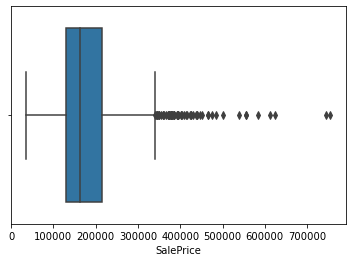

In [133]:
sns.boxplot(data_19['SalePrice'])

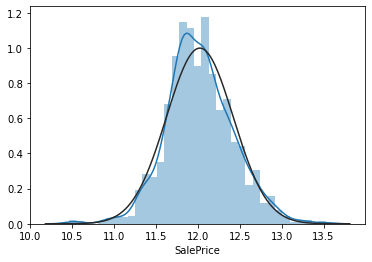

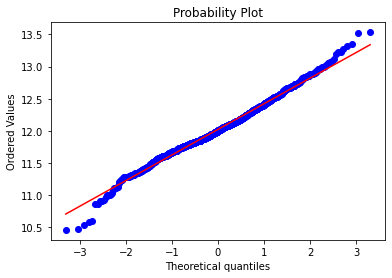

In [137]:
from scipy.stats import skew, norm
y= np.log1p(data_20['SalePrice']).reset_index(drop=True)
sns.distplot(target, fit=norm);
fig = plt.figure()
from scipy import stats
res = stats.probplot(target, plot=plt)

In [138]:
X = data_20.drop(columns='SalePrice')
y= np.log1p(data_20['SalePrice']).reset_index(drop=True)

In [139]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [144]:
from sklearn.model_selection import cross_val_score,RepeatedKFold
cv= RepeatedKFold(n_splits = 5,n_repeats=4,random_state = 42)
def rmse_cv(model):
    return np.sqrt(-cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=cv))

from sklearn import linear_model, svm, neural_network, neighbors, tree, ensemble

import numpy as np
from sklearn import linear_model
from sklearn import svm
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
classifier = [
#         svm.SVR(),
#     linear_model.BayesianRidge(),
#     linear_model.Ridge(),
#     linear_model.ARDRegression(),
        ensemble.RandomForestRegressor(),
        XGBRegressor(),
        CatBoostRegressor(),
        LGBMRegressor()]
        
              
#     neural_network.MLPRegressor(),
#     linear_model.LinearRegression(),
#     linear_model.PassiveAggressiveRegressor(),
#     linear_model.SGDRegressor(),
# #     linear_model.TheilSenRegressor(),
#     tree.DecisionTreeRegressor(),
# #     linear_model.LogisticRegression(),
#     svm.NuSVR(),
             

# for item in classifier:
#     print(item)
#     clf = item
#     clf.fit(X_train,y_train)
#     print('train score: ',clf.score(X_train,y_train))
#     print('test score: ',clf.score(X_test,y_test))
#     print('MAE: ',np.mean(cross_val_score(model,X,y,cv=cv,scoring='neg_mean_absolute_error')),'\n')
    



In [148]:
from sklearn import linear_model, svm, neural_network, neighbors, tree, ensemble
model = ensemble.RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8690346447018391

In [170]:
for item in classifier:
    print(item)
    clf = item
    clf.fit(X_train,y_train)
    print('train score: ',clf.score(X_train,y_train))
    print('test score: ',clf.score(X_test,y_test))
    print('MAE: ',np.mean(cross_val_score(model,X,np.exp(y),cv=cv,scoring='neg_mean_absolute_error')),'\n')

RandomForestRegressor()
train score:  0.9802802975638119
test score:  0.8641213595987844
MAE:  -18281.104673740218 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
train score:  0.9989723427259718
test score:  0.8647652317205065
MAE:  -18327.39812306344 

Learning rate set to 0.040124
0:	learn: 0.3916193	total: 16.3ms	remaining: 16.3s
1:	learn: 0.3825098	total: 35.6ms	remaining: 17.8s
2:	learn: 0.3723095	total: 51.9ms	remaining: 17.2s
3:	learn: 0.3627520	total: 75.4ms	

146:	learn: 0.1133269	total: 8.43s	remaining: 48.9s
147:	learn: 0.1131227	total: 8.46s	remaining: 48.7s
148:	learn: 0.1129482	total: 8.51s	remaining: 48.6s
149:	learn: 0.1126612	total: 8.59s	remaining: 48.7s
150:	learn: 0.1124565	total: 8.66s	remaining: 48.7s
151:	learn: 0.1121975	total: 8.68s	remaining: 48.4s
152:	learn: 0.1120950	total: 8.72s	remaining: 48.3s
153:	learn: 0.1118478	total: 8.74s	remaining: 48s
154:	learn: 0.1116580	total: 8.8s	remaining: 48s
155:	learn: 0.1114775	total: 8.89s	remaining: 48.1s
156:	learn: 0.1112619	total: 8.95s	remaining: 48.1s
157:	learn: 0.1111888	total: 9.08s	remaining: 48.4s
158:	learn: 0.1111342	total: 9.27s	remaining: 49s
159:	learn: 0.1109447	total: 9.35s	remaining: 49.1s
160:	learn: 0.1106170	total: 9.38s	remaining: 48.9s
161:	learn: 0.1104638	total: 9.49s	remaining: 49.1s
162:	learn: 0.1104220	total: 9.68s	remaining: 49.7s
163:	learn: 0.1100912	total: 9.74s	remaining: 49.7s
164:	learn: 0.1098925	total: 9.82s	remaining: 49.7s
165:	learn: 0.10974

308:	learn: 0.0884565	total: 21.9s	remaining: 48.9s
309:	learn: 0.0883141	total: 21.9s	remaining: 48.8s
310:	learn: 0.0882019	total: 22s	remaining: 48.8s
311:	learn: 0.0880353	total: 22.1s	remaining: 48.8s
312:	learn: 0.0880150	total: 22.2s	remaining: 48.7s
313:	learn: 0.0878280	total: 22.3s	remaining: 48.7s
314:	learn: 0.0877220	total: 22.3s	remaining: 48.6s
315:	learn: 0.0876969	total: 22.4s	remaining: 48.6s
316:	learn: 0.0874930	total: 22.5s	remaining: 48.5s
317:	learn: 0.0873949	total: 22.6s	remaining: 48.5s
318:	learn: 0.0872241	total: 22.6s	remaining: 48.3s
319:	learn: 0.0870651	total: 22.8s	remaining: 48.3s
320:	learn: 0.0869208	total: 22.8s	remaining: 48.3s
321:	learn: 0.0867775	total: 22.9s	remaining: 48.2s
322:	learn: 0.0867608	total: 22.9s	remaining: 48s
323:	learn: 0.0866566	total: 23s	remaining: 47.9s
324:	learn: 0.0865422	total: 23s	remaining: 47.8s
325:	learn: 0.0864093	total: 23.1s	remaining: 47.8s
326:	learn: 0.0863104	total: 23.2s	remaining: 47.7s
327:	learn: 0.086215

470:	learn: 0.0737188	total: 33.9s	remaining: 38s
471:	learn: 0.0736102	total: 33.9s	remaining: 37.9s
472:	learn: 0.0735327	total: 33.9s	remaining: 37.8s
473:	learn: 0.0734094	total: 34s	remaining: 37.7s
474:	learn: 0.0733151	total: 34s	remaining: 37.6s
475:	learn: 0.0732200	total: 34s	remaining: 37.5s
476:	learn: 0.0731397	total: 34.1s	remaining: 37.4s
477:	learn: 0.0730610	total: 34.1s	remaining: 37.3s
478:	learn: 0.0729728	total: 34.2s	remaining: 37.2s
479:	learn: 0.0728812	total: 34.2s	remaining: 37s
480:	learn: 0.0728642	total: 34.2s	remaining: 36.9s
481:	learn: 0.0728197	total: 34.3s	remaining: 36.8s
482:	learn: 0.0727278	total: 34.3s	remaining: 36.8s
483:	learn: 0.0727061	total: 34.4s	remaining: 36.6s
484:	learn: 0.0726455	total: 34.4s	remaining: 36.5s
485:	learn: 0.0725052	total: 34.4s	remaining: 36.4s
486:	learn: 0.0724421	total: 34.5s	remaining: 36.3s
487:	learn: 0.0724349	total: 34.5s	remaining: 36.2s
488:	learn: 0.0723453	total: 34.5s	remaining: 36.1s
489:	learn: 0.0722955	

631:	learn: 0.0628484	total: 38.4s	remaining: 22.4s
632:	learn: 0.0628185	total: 38.4s	remaining: 22.3s
633:	learn: 0.0627781	total: 38.5s	remaining: 22.2s
634:	learn: 0.0627105	total: 38.5s	remaining: 22.1s
635:	learn: 0.0626372	total: 38.5s	remaining: 22.1s
636:	learn: 0.0625942	total: 38.6s	remaining: 22s
637:	learn: 0.0625233	total: 38.6s	remaining: 21.9s
638:	learn: 0.0624406	total: 38.6s	remaining: 21.8s
639:	learn: 0.0624063	total: 38.7s	remaining: 21.8s
640:	learn: 0.0623754	total: 38.7s	remaining: 21.7s
641:	learn: 0.0622650	total: 38.7s	remaining: 21.6s
642:	learn: 0.0621998	total: 38.8s	remaining: 21.5s
643:	learn: 0.0621501	total: 38.8s	remaining: 21.4s
644:	learn: 0.0620450	total: 38.8s	remaining: 21.4s
645:	learn: 0.0619429	total: 38.8s	remaining: 21.3s
646:	learn: 0.0618699	total: 38.9s	remaining: 21.2s
647:	learn: 0.0618074	total: 38.9s	remaining: 21.1s
648:	learn: 0.0617917	total: 38.9s	remaining: 21s
649:	learn: 0.0617137	total: 38.9s	remaining: 21s
650:	learn: 0.0616

791:	learn: 0.0541062	total: 43.9s	remaining: 11.5s
792:	learn: 0.0540525	total: 43.9s	remaining: 11.5s
793:	learn: 0.0539958	total: 44s	remaining: 11.4s
794:	learn: 0.0539533	total: 44s	remaining: 11.3s
795:	learn: 0.0539021	total: 44s	remaining: 11.3s
796:	learn: 0.0538193	total: 44.1s	remaining: 11.2s
797:	learn: 0.0537240	total: 44.1s	remaining: 11.2s
798:	learn: 0.0536531	total: 44.1s	remaining: 11.1s
799:	learn: 0.0536109	total: 44.1s	remaining: 11s
800:	learn: 0.0535375	total: 44.1s	remaining: 11s
801:	learn: 0.0534751	total: 44.2s	remaining: 10.9s
802:	learn: 0.0534378	total: 44.2s	remaining: 10.8s
803:	learn: 0.0534330	total: 44.2s	remaining: 10.8s
804:	learn: 0.0533595	total: 44.3s	remaining: 10.7s
805:	learn: 0.0533141	total: 44.3s	remaining: 10.7s
806:	learn: 0.0532560	total: 44.4s	remaining: 10.6s
807:	learn: 0.0532217	total: 44.4s	remaining: 10.6s
808:	learn: 0.0532167	total: 44.4s	remaining: 10.5s
809:	learn: 0.0531606	total: 44.5s	remaining: 10.4s
810:	learn: 0.0531050	

952:	learn: 0.0471836	total: 48.9s	remaining: 2.41s
953:	learn: 0.0471123	total: 48.9s	remaining: 2.36s
954:	learn: 0.0470565	total: 48.9s	remaining: 2.31s
955:	learn: 0.0469994	total: 49s	remaining: 2.25s
956:	learn: 0.0469825	total: 49s	remaining: 2.2s
957:	learn: 0.0469442	total: 49s	remaining: 2.15s
958:	learn: 0.0469013	total: 49s	remaining: 2.1s
959:	learn: 0.0468527	total: 49.1s	remaining: 2.04s
960:	learn: 0.0467754	total: 49.1s	remaining: 1.99s
961:	learn: 0.0467464	total: 49.1s	remaining: 1.94s
962:	learn: 0.0467272	total: 49.1s	remaining: 1.89s
963:	learn: 0.0466623	total: 49.2s	remaining: 1.83s
964:	learn: 0.0466441	total: 49.2s	remaining: 1.78s
965:	learn: 0.0465948	total: 49.2s	remaining: 1.73s
966:	learn: 0.0465761	total: 49.2s	remaining: 1.68s
967:	learn: 0.0465234	total: 49.2s	remaining: 1.63s
968:	learn: 0.0464888	total: 49.3s	remaining: 1.58s
969:	learn: 0.0464610	total: 49.3s	remaining: 1.52s
970:	learn: 0.0464077	total: 49.3s	remaining: 1.47s
971:	learn: 0.0463746	